# AWS SaaS Sales


## Background
Dalam dunia bisnis yang semakin kompetitif, perusahaan SaaS perlu memahami kinerja penjualan mereka secara mendalam untuk tetap relevan di pasar. Dataset yang tersedia mencakup hampir 10.000 entri yang berisi informasi penting tentang pesanan, pelanggan, produk, diskon, keuntungan, dan lokasi geografis. Analisis ini diperlukan untuk mengidentifikasi pola yang dapat memberikan wawasan strategis, seperti kontribusi masing-masing produk, pelanggan, dan segmen pasar terhadap total penjualan, serta dampak strategi diskon terhadap profitabilitas. Selain itu, pemetaan kinerja geografis dapat membantu perusahaan menyusun strategi pemasaran yang lebih efektif, sehingga meningkatkan efisiensi operasional dan daya saing di pasar global.

## Problem Statement
Perusahaan menghadapi tantangan untuk memahami kontribusi produk, pelanggan, dan segmen pasar terhadap total penjualan dan keuntungan, sambil mengidentifikasi dampak strategi diskon terhadap profitabilitas secara keseluruhan. Selain itu, diperlukan analisis kinerja berdasarkan lokasi geografis untuk menentukan wilayah dengan performa terbaik dan menyusun strategi pemasaran yang lebih efektif.

# Objectives
## 1. Analisis Keuntungan atau Kerugian Perusahaan (2020-2023)
- **Pertanyaan**: Apakah dalam rentang waktu 2020-2023 perusahaan mengalami keuntungan atau kerugian?
- **Langkah Analisis**:
  - Hitung total penjualan (`sales`) dan profit (`profit`) untuk setiap tahun dalam rentang waktu 2020-2023.
  - Bandingkan total profit dengan total kerugian (jika ada).

---

## 2. Analisis Produk Berdasarkan Sales dan Profit
- **Pertanyaan**:
  - Apa saja produk yang menghasilkan sales dan profit paling besar?
  - Apa saja produk yang menghasilkan sales dan profit paling kecil?
  - Bagaimana pengaruh diskon terhadap profit dan loss?
- **Langkah Analisis**:
  - Identifikasi produk dengan total sales dan profit tertinggi serta terendah.
  - Analisis data diskon (`discount`) dan hubungannya dengan profit dan loss.

---

## 3. Analisis Konsumen, Perusahaan, dan Industri
- **Pertanyaan**:
  - Perusahaan dan industri mana saja yang menyumbang pendapatan terbesar dan terkecil?
  - Di daerah mana terjadi profit dan loss?
- **Langkah Analisis**:
  - Kelompokkan data berdasarkan perusahaan dan industri, lalu hitung total pendapatan untuk masing-masing.
  - Analisis distribusi profit dan loss berdasarkan wilayah geografis (region atau kota).

## Data Exploration

In [1]:
# Import Libraries that we need
import pandas as pd
import numpy as np
from scipy.stats import zscore, shapiro, normaltest, kstest
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Open the Dataset
df = pd.read_csv('SaaS-Sales.csv')
df.head()

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

In [4]:
df.describe()

,Row ID,Date Key,Customer ID,Sales,Quantity,Discount,Profit
count,9994.000000,9.994000e+03,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2.021803e+07,1049.771963,229.858001,3.789574,0.156203,28.656896
std,2885.163629,1.123898e+04,29.719388,623.245101,2.225110,0.206452,234.260108
min,1.000000,2.020010e+07,1001.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2.021052e+07,1024.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2.022063e+07,1049.000000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2.023052e+07,1076.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2.023123e+07,1101.000000,22638.480000,14.000000,0.800000,8399.976000


# Data Cleaning
Dalam melakukan data cleaning, yang akan dilakukan adalah melakukan pengecekan terhadap missing values, data duplikat, string formatting, dan outlier. 

### Missing Values

In [5]:
# Check Missing Values
missing_values = df.isnull().sum()

# Display the result
print("Jumlah missing values per kolom:")
print(missing_values)

Jumlah missing values per kolom:
Row ID          0
Order ID        0
Order Date      0
Date Key        0
Contact Name    0
Country         0
City            0
Region          0
Subregion       0
Customer        0
Customer ID     0
Industry        0
Segment         0
Product         0
License         0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64


#### *Hasilnya adalah tidak ada missing values

### Duplicate Rows

In [6]:
# Check for duplicate rows in the dataset
duplicate_rows_count = df.duplicated().sum()

# Display the number of duplicate rows
print("Duplicate Rows:", duplicate_rows_count)

Duplicate Rows: 0


#### *Hasilnya adalah tidak ada data duplikat

### Formatting Issues

In [7]:
# Check for leading/trailing spaces and case inconsistency in string columns
string_columns = df.select_dtypes(include='object')
formatting_issues = string_columns.apply(lambda col: col.str.contains(r'^\s|\s$', na=False).sum())

# Check for date column validity
# Attempt to convert date columns and count any conversion errors
date_formatting_issues = {}
for column in df.columns:
    if "Date" in column:
        try:
            pd.to_datetime(df[column])
            date_formatting_issues[column] = 0  # No issue
        except Exception:
            date_formatting_issues[column] = df[column].notna().sum()  # Count non-NaN errors

# Combine results
formatting_summary = pd.DataFrame({
    'String Formatting Issues': formatting_issues,
    'Date Formatting Issues': pd.Series(date_formatting_issues)
}).fillna(0).astype(int)

# Display the formatting issues summary
formatting_summary

,String Formatting Issues,Date Formatting Issues
City,0,0
Contact Name,0,0
Country,0,0
Customer,0,0
Date Key,0,0
Industry,0,0
License,0,0
Order Date,0,0
Order ID,0,0
Product,0,0


#### *Hasilnya adalah tidak ada formatting issues

### Outliers

### IQR Method

In [8]:
# Select numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Initialize an empty list to store results
iqr_outliers_summary = {
    "Type": [],
    "Num of Outliers": [],
    "Percentage": []
}

for col in numeric_columns:
    Q1 = df[col].quantile(0.25)  # First quartile
    Q3 = df[col].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1                # Interquartile range
    lower_bound = Q1 - 1.5 * IQR  # Lower bound
    upper_bound = Q3 + 1.5 * IQR  # Upper bound
    # Detect outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    # Append results to summary
    iqr_outliers_summary["Type"].append(col)
    iqr_outliers_summary["Num of Outliers"].append(len(outliers))
    iqr_outliers_summary["Percentage"].append((len(outliers) / len(df)) * 100)

# Create a summary DataFrame
iqr_outliers_summary_df = pd.DataFrame(iqr_outliers_summary)

# Display the summary DataFrame
iqr_outliers_summary_df

,Type,Num of Outliers,Percentage
0,Row ID,0,0.000000
1,Date Key,0,0.000000
2,Customer ID,0,0.000000
3,Sales,1167,11.677006
4,Quantity,170,1.701021
5,Discount,856,8.565139
6,Profit,1881,18.821293


Note : 
Hasilnya ternyata banyak sekali outlier, bahkan untuk kolom profit bisa terdapat sebanyak 18.82% outliers.

In [9]:
# Select numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Initialize an empty list to store results
zscore_outliers_summary = {
    "Type": [],
    "Num of Outliers": [],
    "Percentage": []
}

for col in numeric_columns:
    # Calculate Z-scores for the column
    z_scores = zscore(df[col].dropna())
    # Identify outliers where |Z| > 3
    outliers = df[col][(z_scores > 3) | (z_scores < -3)]
    # Append results to summary
    zscore_outliers_summary["Type"].append(col)
    zscore_outliers_summary["Num of Outliers"].append(len(outliers))
    zscore_outliers_summary["Percentage"].append((len(outliers) / len(df)) * 100)

# Create a summary DataFrame
zscore_outliers_summary_df = pd.DataFrame(zscore_outliers_summary)

# Display the summary DataFrame
zscore_outliers_summary_df

,Type,Num of Outliers,Percentage
0,Row ID,0,0.000000
1,Date Key,0,0.000000
2,Customer ID,0,0.000000
3,Sales,127,1.270762
4,Quantity,113,1.130678
5,Discount,300,3.001801
6,Profit,107,1.070642


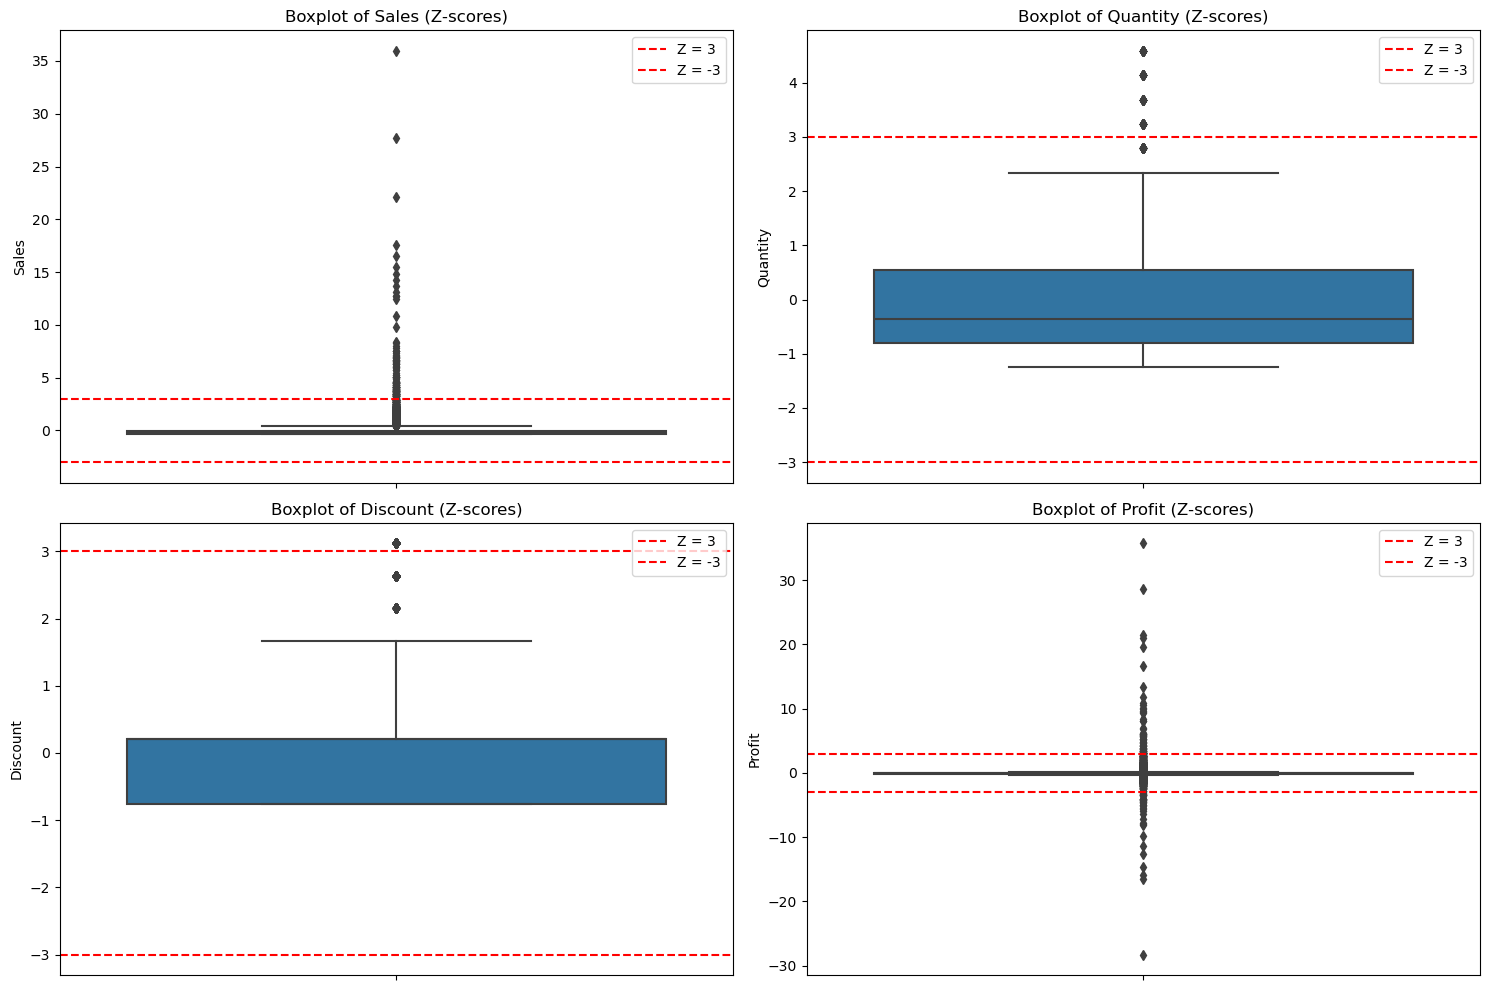

In [10]:
# Kolom yang ingin divisualisasikan
columns_to_plot = ['Sales', 'Quantity', 'Discount', 'Profit']

# Calculate Z-scores for selected columns
z_scores_selected = df[columns_to_plot].apply(zscore)

# Plot boxplots for the selected columns
plt.figure(figsize=(15, 10))

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 2, i)  # 2 rows, 2 columns
    sns.boxplot(data=z_scores_selected, y=column)
    plt.axhline(y=3, color='red', linestyle='--', label='Z = 3')  # Upper threshold
    plt.axhline(y=-3, color='red', linestyle='--', label='Z = -3')  # Lower threshold
    plt.title(f"Boxplot of {column} (Z-scores)")
    plt.legend()

plt.tight_layout()
plt.show()


Keputusannya adalah untuk tidak menghapus outlier yang banyak tersebut karena beberapa alasan sebagai berikut:

- **Informasi Penting**:
  - Outlier mencerminkan transaksi besar, diskon ekstrem, atau pola pembelian yang relevan untuk analisis bisnis SaaS sales.

- **Validitas Data**:
  - Tidak ditemukan indikasi bahwa outlier adalah hasil dari kesalahan data, sehingga layak untuk dipertimbangkan.

- **Tujuan Analisis**:
  - Fokus analisis adalah eksplorasi data, bukan prediksi, sehingga outlier memberikan gambaran lengkap tentang distribusi dan perilaku pelanggan.

- **Ketidakpastian Domain Knowledge**:
  - Karena tidak sepenuhnya memahami perhitungan di balik kolom seperti **Profit** atau **Sales**, menghapus outlier tanpa alasan yang kuat dapat menghilangkan data penting yang mungkin memiliki konteks relevan dalam domain bisnis.

---

## Data Distribution


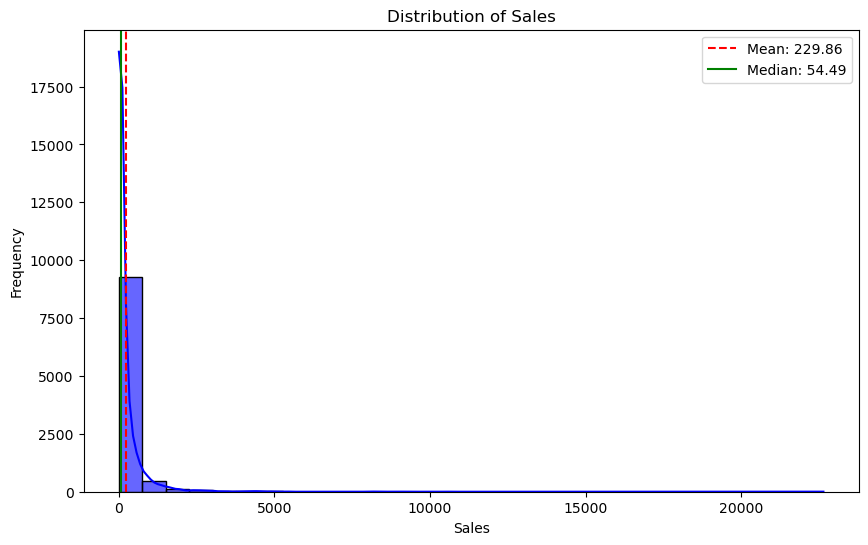

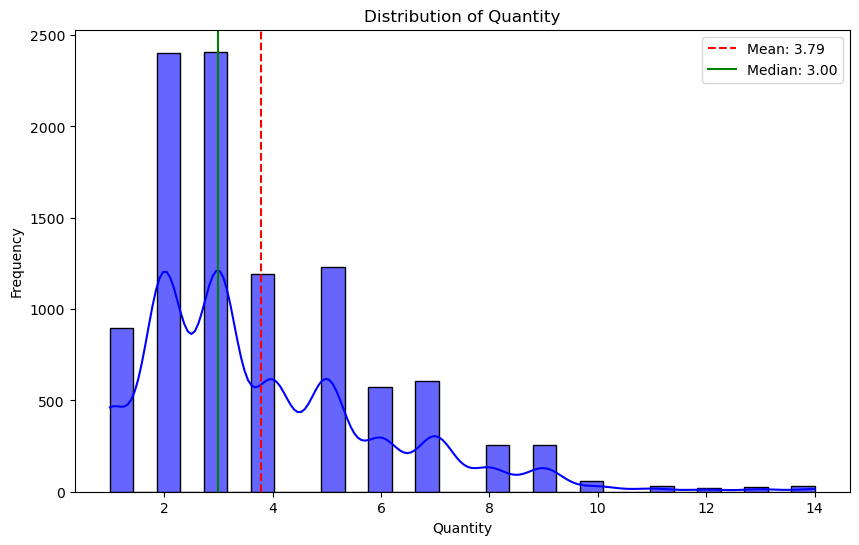

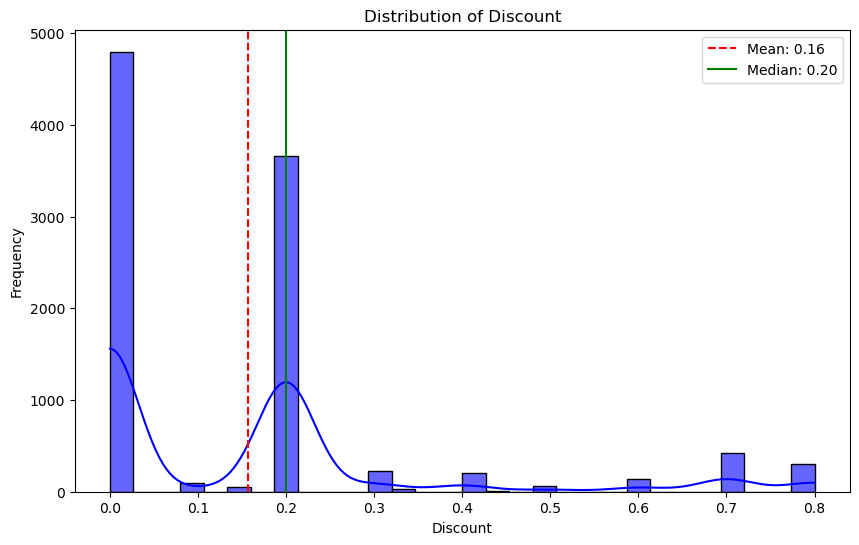

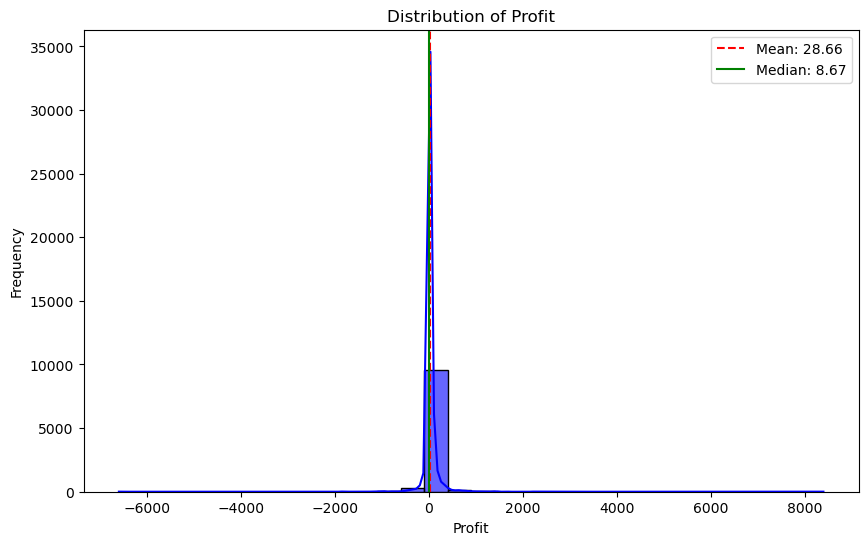

In [11]:
# List of numeric columns to check distribution
numeric_columns = ['Sales', 'Quantity', 'Discount', 'Profit']

for col in numeric_columns:
    plt.figure(figsize=(10, 6))
    
    # Plot histogram with KDE
    sns.histplot(df[col], kde=True, bins=30, color="blue", alpha=0.6)
    
    # Calculate mean and median
    mean = df[col].mean()
    median = df[col].median()
    
    # Add vertical lines for mean and median
    plt.axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.2f}')
    plt.axvline(median, color='green', linestyle='-', label=f'Median: {median:.2f}')
    
    # Add titles and labels
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.legend()
    
    # Show plot
    plt.show()

Berdasarkan visualisasi yang dihasilkan, bisa dilakukan sedikit analisis yaitu:
1. **Sales**:
   - Distribusi **melenceng ke kanan (right-skewed)** dengan mayoritas penjualan bernilai rendah, namun terdapat beberapa transaksi besar yang menyebabkan rata-rata (229.86) jauh lebih tinggi dari median (54.49). Transaksi besar ini mungkin berasal dari pelanggan strategis.

2. **Quantity**:
   - Distribusi mendekati normal dengan sedikit melenceng ke kanan. Mayoritas pelanggan membeli dalam jumlah kecil (median: 3), tetapi ada beberapa transaksi dalam jumlah besar yang meningkatkan rata-rata menjadi 3.79.

3. **Discount**:
   - Diskon cenderung terpusat pada nilai 0.0 dan 0.2, dengan rata-rata (0.16) lebih kecil dari median (0.20). Ini menunjukkan strategi diskon kecil yang sering digunakan, tetapi diskon 20% tampaknya cukup populer.

4. **Profit**:
   - Distribusi **melenceng ke kiri (left-skewed)** dengan sebagian besar transaksi memiliki profit rendah atau bahkan negatif. Median (8.67) lebih kecil dari rata-rata (28.66), menunjukkan beberapa transaksi besar yang menghasilkan profit signifikan.

Note : tidak perlu melakukan tes statistik normalitas karena datanya jelas tidak berdistribusi normal.

## Data Analysis and Visualization

#### 1. Analisis Keuntungan atau Kerugian Perusahaan (2020-2023)
- **Pertanyaan**: Apakah dalam rentang waktu 2020-2023 perusahaan mengalami keuntungan atau kerugian?
- **Langkah Analisis**:
  - Hitung total penjualan (`sales`) dan profit (`profit`) untuk setiap tahun dalam rentang waktu 2020-2023.
  - Bandingkan total profit dengan total kerugian (jika ada).

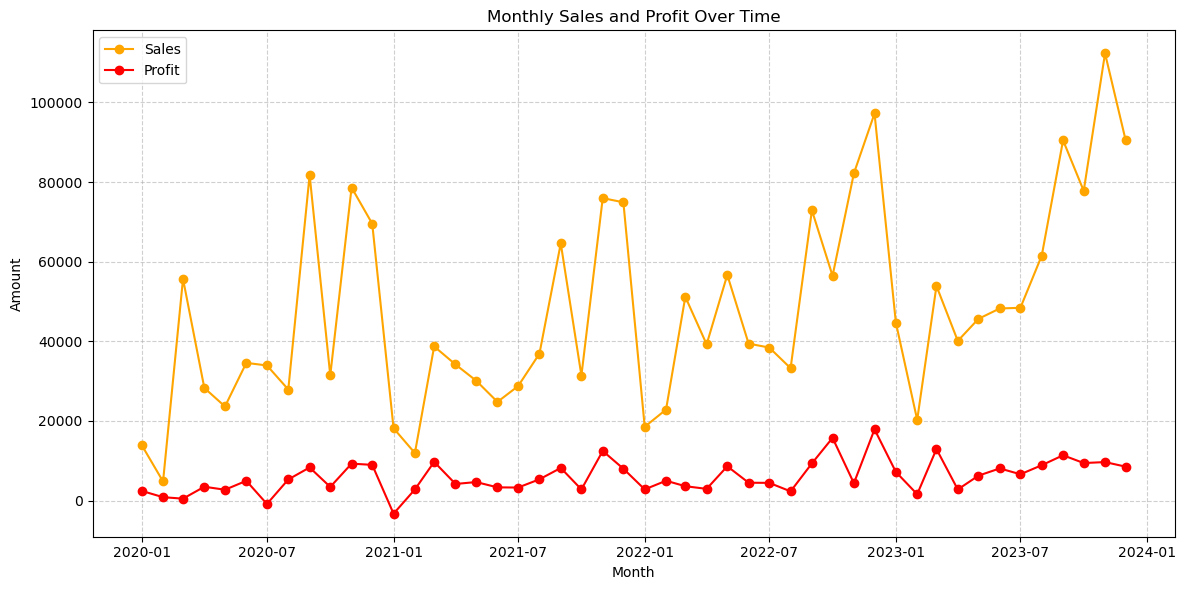

In [12]:
# Pastikan kolom tanggal dalam format datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Filter data antara 2020 hingga 2023
filtered_data = df[(df['Order Date'] >= '2020-01-01') & (df['Order Date'] < '2024-01-01')]

# Group by month and calculate total sales and profit
monthly_data = filtered_data.groupby(filtered_data['Order Date'].dt.to_period('M')).agg({
    'Sales': 'sum',
    'Profit': 'sum'
}).reset_index()

# Convert 'Order Date' to datetime for plotting
monthly_data['Order Date'] = monthly_data['Order Date'].dt.to_timestamp()

# Plot sales and profit over time
plt.figure(figsize=(12, 6))

plt.plot(monthly_data['Order Date'], monthly_data['Sales'], label='Sales', color='orange', marker='o')
plt.plot(monthly_data['Order Date'], monthly_data['Profit'], label='Profit', color='red', marker='o')

plt.title("Monthly Sales and Profit Over Time")
plt.xlabel("Month")
plt.ylabel("Amount")
plt.legend()
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### **Analisis Time Series Sales dan Profit (2020-2023)**

- **Keuntungan Total**: Perusahaan mencatatkan total keuntungan sebesar **$286,397.02** dari 2020 hingga 2023.
- **Pergerakan Fluktuatif**:
  - **Sales** dan **Profit** menunjukkan pola **fluktuatif** setiap bulan.
  - **Profit** mengikuti pola **sales**, tetapi tidak selalu berbanding lurus karena pengaruh:
    - Diskon besar.
    - Faktor lain seperti **margin keuntungan** dan **biaya operasional** (tidak tersedia di dataset).
- **Pola Menarik**:
  - Puncak **sales** sering terjadi menjelang **akhir tahun**, kemungkinan karena promosi atau strategi khusus.
  - Beberapa bulan menunjukkan **profit rendah meski sales tinggi** (contoh: **2020-03**, **2022-03**, **2022-11**, **2023-11**).
- **Kesimpulan**: Perusahaan berhasil menjaga **kestabilan** dan menunjukkan **pertumbuhan positif**, dengan tren **sales** dan **profit** yang meningkat secara keseluruhan.

---


#### 2. Analisis Produk Berdasarkan Sales dan Profit
- **Pertanyaan**:
  - Apa saja produk yang menghasilkan sales dan profit paling besar?
  - Apa saja produk yang menghasilkan sales dan profit paling kecil?
  - Bagaimana pengaruh diskon terhadap profit dan loss?
- **Langkah Analisis**:
  - Identifikasi produk dengan total sales dan profit tertinggi serta terendah.
  - Analisis data diskon (`discount`) dan hubungannya dengan profit dan loss.

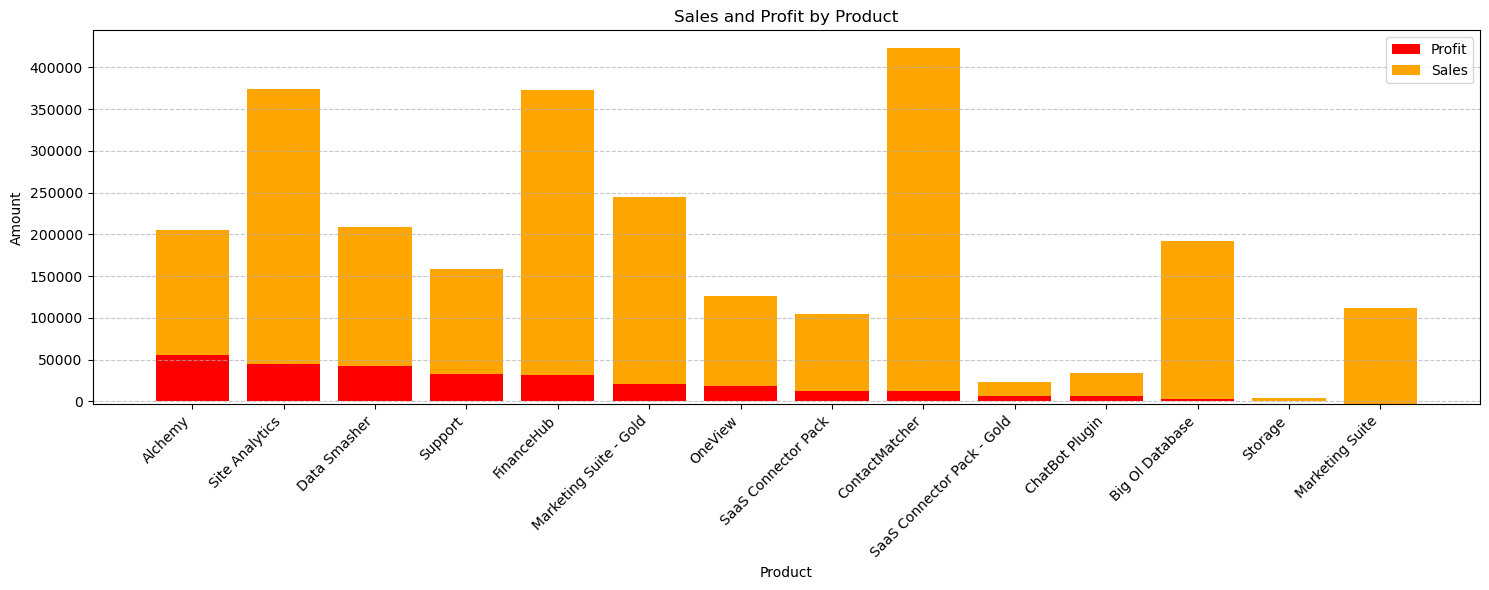

In [13]:
# Grup data berdasarkan produk dan hitung total sales serta profit
product_data = df.groupby('Product').agg({
    'Sales': 'sum',
    'Profit': 'sum'
}).reset_index()

# Urutkan produk berdasarkan profit
product_data = product_data.sort_values(by='Profit', ascending=False)

# Buat stacked bar chart
plt.figure(figsize=(15, 6))
plt.bar(product_data['Product'], product_data['Profit'], label='Profit', color='red')
plt.bar(product_data['Product'], product_data['Sales'], label='Sales', color='orange', bottom=product_data['Profit'])

# Tambahkan label, judul, dan legenda
plt.xticks(rotation=45, ha='right')
plt.title("Sales and Profit by Product")
plt.ylabel("Amount")
plt.xlabel("Product")
plt.legend()

# Tambahkan grid untuk memperjelas visualisasi
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Tampilkan grafik
plt.show()


  - **Alchemy**, **Site Analytics**, dan **Data Smasher** adalah produk dengan profit tertinggi.


  - **ContactMatcher**, **FinanceHub**, dan **Site Analytics** adalah produk dengan nilai sales paling tinggi.


  - **Marketing Suite** adalah produk yang menunjukkan kerugian.

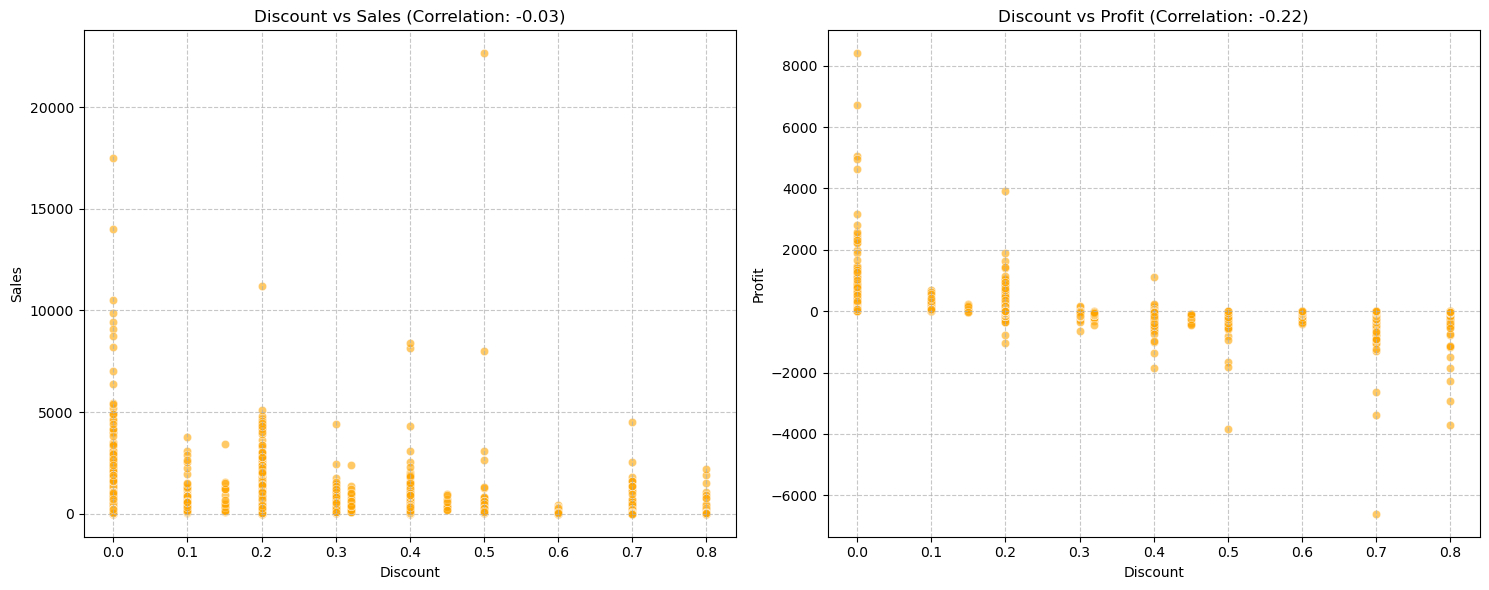

In [14]:
# Hitung korelasi antara Discount dengan Sales dan Profit
corr_sales = df['Discount'].corr(df['Sales'])
corr_profit = df['Discount'].corr(df['Profit'])

# Membuat subplot untuk kedua scatterplot
plt.figure(figsize=(15, 6))

# Scatterplot Discount vs Sales
plt.subplot(1, 2, 1)
sns.scatterplot(x='Discount', y='Sales', data=df, color='orange', alpha=0.6)
plt.title(f"Discount vs Sales (Correlation: {corr_sales:.2f})")
plt.xlabel("Discount")
plt.ylabel("Sales")
plt.grid(axis='both', linestyle='--', alpha=0.7)

# Scatterplot Discount vs Profit
plt.subplot(1, 2, 2)
sns.scatterplot(x='Discount', y='Profit', data=df, color='orange', alpha=0.6)
plt.title(f"Discount vs Profit (Correlation: {corr_profit:.2f})")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.grid(axis='both', linestyle='--', alpha=0.7)

# Tampilkan grafik
plt.tight_layout()
plt.show()

- **Korelasi Diskon dengan Sales**:
  - Nilai korelasi antara diskon dan sales adalah **-0.03**.
  - Korelasi negatif ini menunjukkan bahwa diskon **tidak memiliki pengaruh signifikan terhadap peningkatan penjualan**.

- **Korelasi Diskon dengan Profit**:
  - Nilai korelasi antara diskon dan profit adalah **-0.22**.
  - Korelasi negatif ini menunjukkan bahwa diskon tinggi cenderung **menurunkan profit**, kemungkinan karena margin keuntungan yang berkurang.

- **Rentang Diskon Optimal**:
  - Berdasarkan analisis, rentang diskon yang optimal diperkirakan berada di **0% hingga 30%**.

---

#### **Analisis Produk: Alchemy dan Marketing Suite**

##### **1. Alchemy**
- **Sales**: $149,528.03
- **Profit**: $55,617.82
- **Total Transaksi**: 68 kali
- **Rentang Diskon**: 0% - 40%
- **Rata-Rata Diskon**: 16%
- **Kesimpulan**:
  - Alchemy menunjukkan performa yang baik dengan profit tinggi meskipun memiliki diskon hingga 40%. Rata-rata diskon 16% masih tergolong optimal.

##### **2. Marketing Suite**
- **Sales**: $114,880
- **Profit**: -$3,472.56 (kerugian)
- **Total Transaksi**: 228 kali
- **Rentang Diskon**: 0% - 70%
- **Rata-Rata Diskon**: 21%
- **Kesimpulan**:
  - Marketing Suite mengalami kerugian meskipun memiliki sales tinggi. Diskon besar hingga 70% dengan rata-rata 21% kemungkinan menjadi penyebab utama turunnya profit.
  
---


#### 3. Analisis Konsumen, Perusahaan, dan Industri
- **Pertanyaan**:
  - Perusahaan dan industri mana saja yang menyumbang pendapatan terbesar dan terkecil?
  - Di daerah mana terjadi profit dan loss?
- **Langkah Analisis**:
  - Kelompokkan data berdasarkan perusahaan dan industri, lalu hitung total pendapatan untuk masing-masing.
  - Analisis distribusi profit dan loss berdasarkan wilayah geografis (region atau kota).

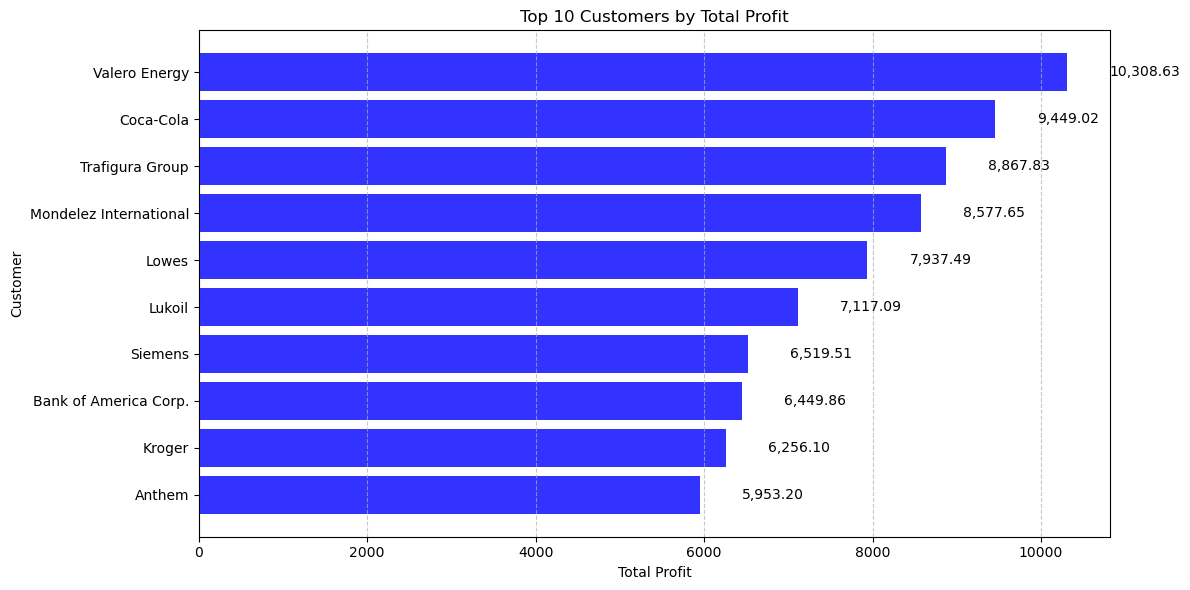

In [15]:
# Grup data berdasarkan pelanggan (Customer) dan hitung total profit
customer_data = df.groupby('Customer').agg({'Profit': 'sum'}).reset_index()

# Urutkan data berdasarkan profit (dari terbesar ke terkecil) dan ambil 10 pelanggan teratas
top_customers = customer_data.sort_values(by='Profit', ascending=False).head(10)

# Balik urutan untuk memastikan profit terbesar berada di atas
top_customers = top_customers.iloc[::-1]

# Plot horizontal bar chart
plt.figure(figsize=(12, 6))
bars = plt.barh(top_customers['Customer'], top_customers['Profit'], color='blue', alpha=0.8)

# Tambahkan angka di ujung setiap bar
for bar in bars:
    plt.text(bar.get_width() + 500, bar.get_y() + bar.get_height() / 2, 
             f'{bar.get_width():,.2f}', va='center', fontsize=10)

# Tambahkan label, judul, dan grid
plt.title("Top 10 Customers by Total Profit")
plt.xlabel("Total Profit")
plt.ylabel("Customer")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Tampilkan grafik
plt.show()

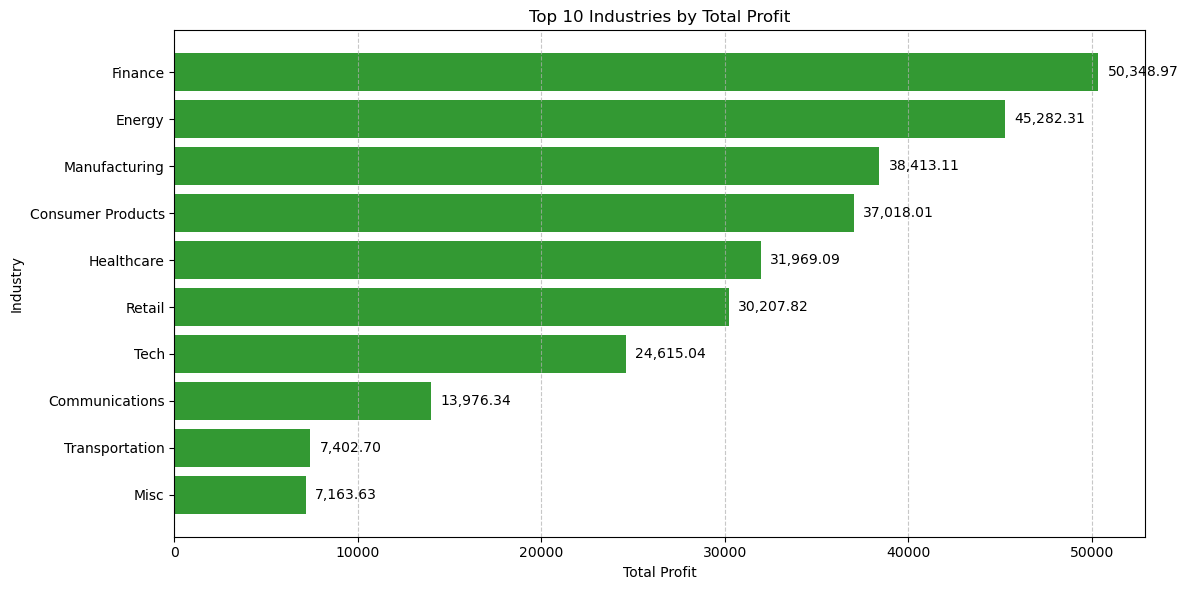

In [16]:
# Grup data berdasarkan industri (Industry) dan hitung total profit
industry_data = df.groupby('Industry').agg({'Profit': 'sum'}).reset_index()

# Urutkan data berdasarkan profit (dari terbesar ke terkecil) dan ambil 10 industri teratas
top_industries = industry_data.sort_values(by='Profit', ascending=False).head(10)

# Balik urutan untuk memastikan profit terbesar berada di atas
top_industries = top_industries.iloc[::-1]

# Plot horizontal bar chart
plt.figure(figsize=(12, 6))
bars = plt.barh(top_industries['Industry'], top_industries['Profit'], color='green', alpha=0.8)

# Tambahkan angka di ujung setiap bar
for bar in bars:
    plt.text(bar.get_width() + 500, bar.get_y() + bar.get_height() / 2, 
             f'{bar.get_width():,.2f}', va='center', fontsize=10)

# Tambahkan label, judul, dan grid
plt.title("Top 10 Industries by Total Profit")
plt.xlabel("Total Profit")
plt.ylabel("Industry")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Tampilkan grafik
plt.show()

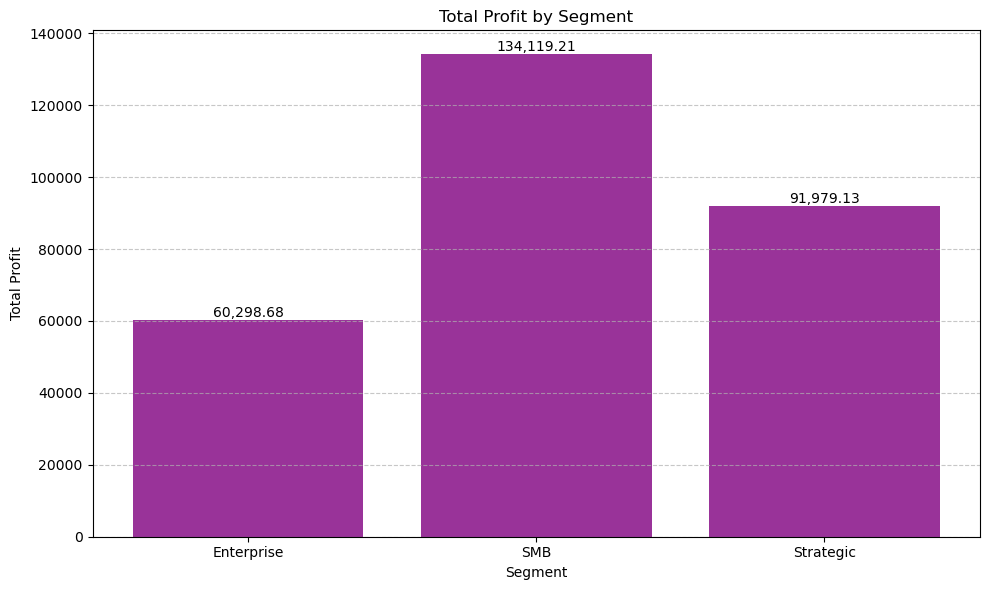

In [17]:
# Grup data berdasarkan segment dan hitung total profit
segment_data = df.groupby('Segment').agg({'Profit': 'sum'}).reset_index()

# Plot bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(segment_data['Segment'], segment_data['Profit'], color='purple', alpha=0.8)

# Tambahkan angka di atas setiap bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
             f'{bar.get_height():,.2f}', ha='center', va='bottom', fontsize=10)

# Tambahkan label, judul, dan grid
plt.title("Total Profit by Segment")
plt.xlabel("Segment")
plt.ylabel("Total Profit")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Tampilkan grafik
plt.show()

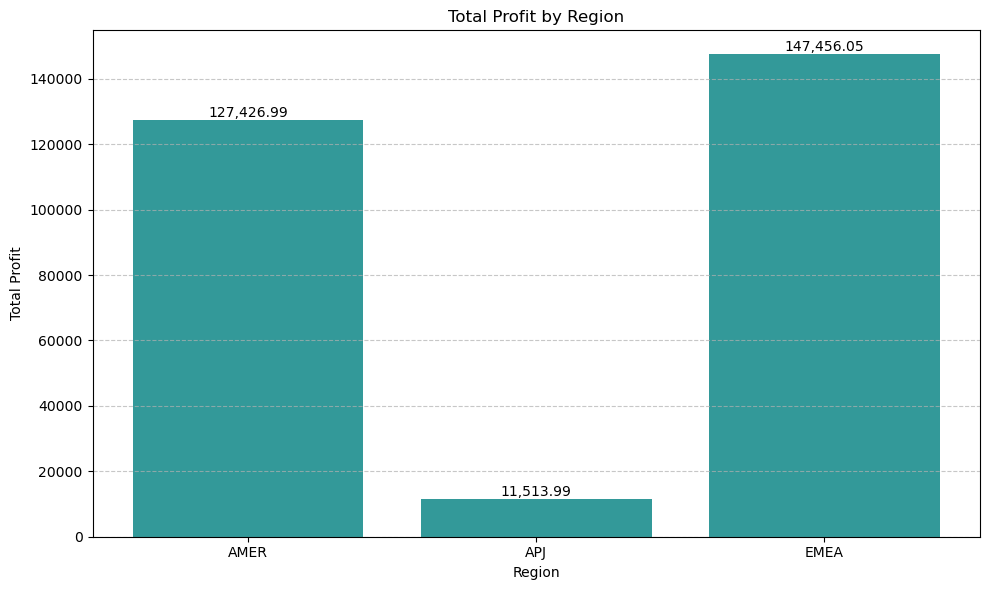

In [18]:
# Grup data berdasarkan region dan hitung total profit
region_data = df.groupby('Region').agg({'Profit': 'sum'}).reset_index()

# Plot bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(region_data['Region'], region_data['Profit'], color='teal', alpha=0.8)

# Tambahkan angka di atas setiap bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
             f'{bar.get_height():,.2f}', ha='center', va='bottom', fontsize=10)

# Tambahkan label, judul, dan grid
plt.title("Total Profit by Region")
plt.xlabel("Region")
plt.ylabel("Total Profit")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Tampilkan grafik
plt.show()

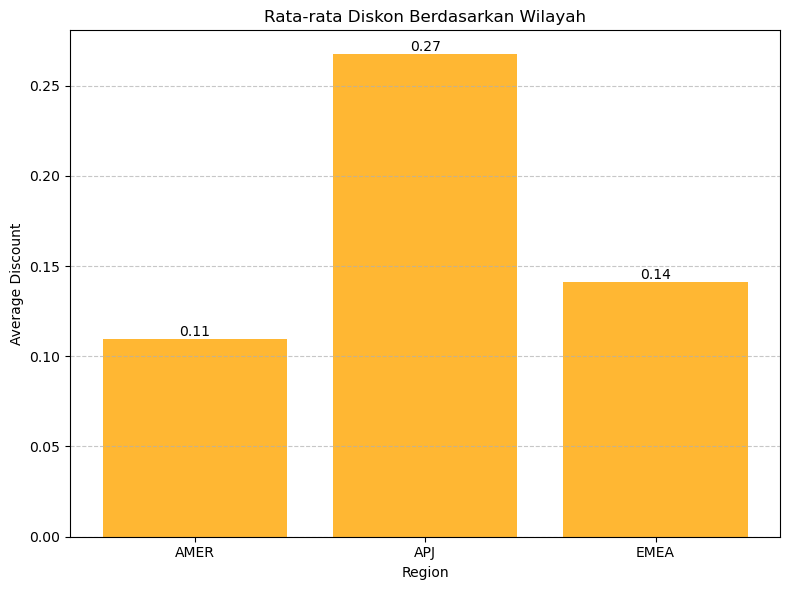

In [19]:
# Grup data berdasarkan wilayah (Region) dan hitung rata-rata diskon
region_discount = df.groupby('Region').agg({'Discount': 'mean'}).reset_index()

# Plot bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(region_discount['Region'], region_discount['Discount'], color='orange', alpha=0.8)

# Tambahkan angka di atas setiap bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
             f'{bar.get_height():.2f}', ha='center', va='bottom', fontsize=10)

# Tambahkan label, judul, dan grid
plt.title("Rata-rata Diskon Berdasarkan Wilayah")
plt.xlabel("Region")
plt.ylabel("Average Discount")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Tampilkan grafik
plt.show()

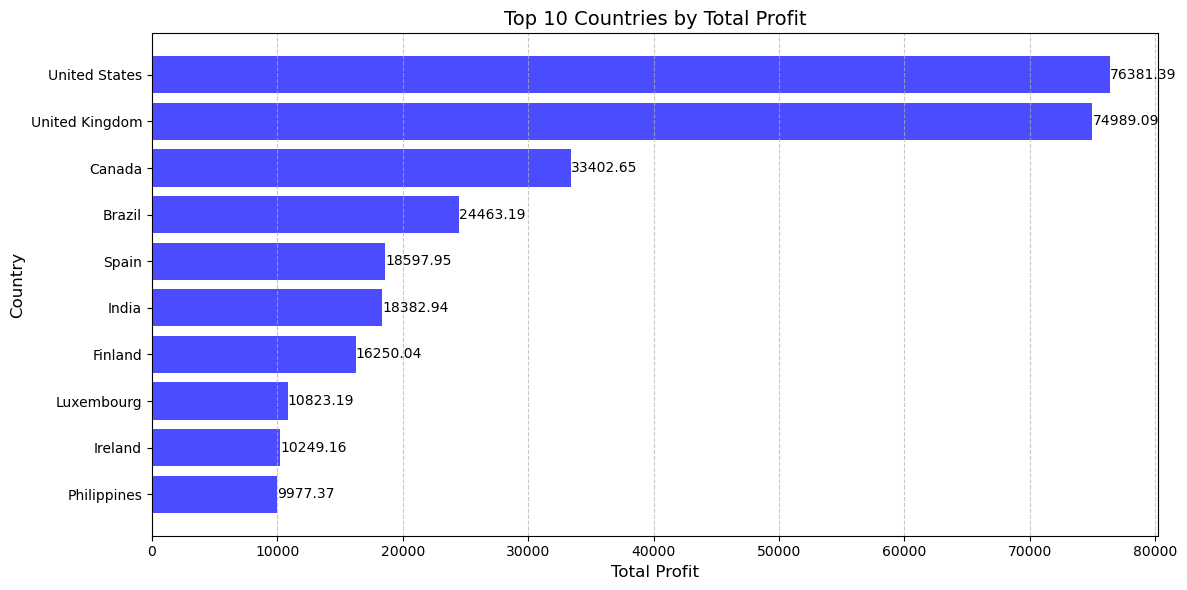

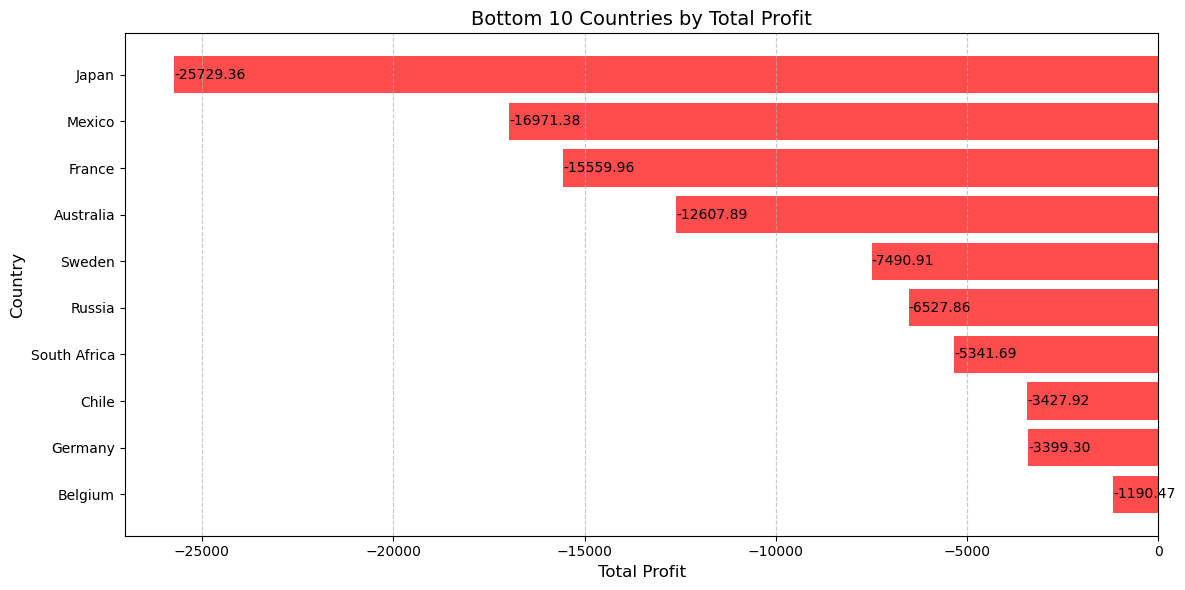

In [20]:
# Group data by country and calculate total profit
country_profit = df.groupby('Country').agg(
    Total_Profit=('Profit', 'sum')
).reset_index()

# Top 10 countries with the highest profit
top_10_countries = country_profit.sort_values('Total_Profit', ascending=False).head(10)

# Bottom 10 countries with the lowest profit
bottom_10_countries = country_profit.sort_values('Total_Profit', ascending=True).head(10)

# Plot Top 10 Countries by Profit
plt.figure(figsize=(12, 6))
plt.barh(top_10_countries['Country'], top_10_countries['Total_Profit'], color='blue', alpha=0.7)
plt.title('Top 10 Countries by Total Profit', fontsize=14)
plt.xlabel('Total Profit', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Annotate profit values
for index, value in enumerate(top_10_countries['Total_Profit']):
    plt.text(value, index, f'{value:.2f}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

# Plot Bottom 10 Countries by Profit
plt.figure(figsize=(12, 6))
plt.barh(bottom_10_countries['Country'], bottom_10_countries['Total_Profit'], color='red', alpha=0.7)
plt.title('Bottom 10 Countries by Total Profit', fontsize=14)
plt.xlabel('Total Profit', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Annotate profit values
for index, value in enumerate(bottom_10_countries['Total_Profit']):
    plt.text(value, index, f'{value:.2f}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

##### **Top 10 Customers by Total Profit**
- Pelanggan dengan kontribusi profit terbesar adalah **Valero Energy**, diikuti oleh **Coca-Cola** dan **Trafigura Group**, yang menunjukkan bahwa perusahaan memiliki pelanggan utama yang sangat berkontribusi terhadap profit secara keseluruhan.

---

##### **Top 10 Industries by Total Profit**
- Industri **Finance**, **Energy**, dan **Manufacturing** menyumbang profit terbesar, menandakan bahwa perusahaan memiliki keunggulan atau permintaan tinggi di sektor-sektor ini.

---

##### **Total Profit by Segment**
- Segmen **SMB (Small and Medium Business)** memberikan kontribusi profit terbesar dibandingkan segmen lainnya, menunjukkan pentingnya fokus pada bisnis kecil dan menengah.

---

##### **Total Profit by Region**
- Wilayah **EMEA (Europe, Middle East, and Africa)** memiliki profit tertinggi, diikuti oleh **AMER (Americas)**, sementara **APJ (Asia-Pacific & Japan)** menunjukkan profit paling kecil, mengindikasikan peluang untuk peningkatan di wilayah tersebut.

---

##### **Top 10 Countries by Total Profit**
- Negara **United States** dan **United Kingdom** mendominasi kontribusi profit, menunjukkan bahwa pasar di kedua negara ini sangat penting bagi keberhasilan perusahaan.

---

##### **Bottom 10 Countries by Total Profit**
- Negara seperti **Japan**, **Mexico**, dan **France** mengalami kerugian terbesar, menunjukkan potensi masalah operasional atau strategi di negara-negara ini yang perlu dievaluasi.

---


### **Kesimpulan**
1. **Profit dan Sales secara Umum**:
   - Perusahaan mengalami **keuntungan total sebesar $286,397.02** selama periode 2020-2023.
   - **Sales** dan **Profit** menunjukkan tren yang fluktuatif setiap bulan, dengan puncak terjadi di bulan-bulan akhir tahun, kemungkinan karena adanya promosi atau strategi penjualan musiman.
   - Beberapa bulan dengan **sales tinggi tetapi profit rendah** diindikasikan oleh diskon besar atau biaya operasional yang tinggi.

2. **Analisis Produk**:
   - Produk **Alchemy**, **Site Analytics**, dan **Data Smasher** adalah tiga produk dengan **profit tertinggi**, sedangkan **Marketing Suite** mengalami kerugian.
   - Diskon memiliki korelasi negatif dengan profit (**-0.22**), menunjukkan bahwa diskon besar cenderung menurunkan margin keuntungan.

3. **Analisis Pelanggan, Industri, dan Lokasi**:
   - **Valero Energy**, **Coca-Cola**, dan **Trafigura Group** adalah pelanggan dengan kontribusi profit terbesar, sedangkan beberapa pelanggan lain menunjukkan kontribusi negatif.
   - Industri **Finance**, **Energy**, dan **Manufacturing** memberikan kontribusi profit tertinggi, sementara sektor lain, seperti **Transportation** dan **Misc**, memiliki kontribusi lebih kecil.
   - Wilayah **EMEA** (Europe, Middle East, and Africa) memiliki profit tertinggi, diikuti oleh **AMER** (Americas), sementara wilayah **APJ** (Asia-Pacific & Japan) memberikan kontribusi yang relatif kecil.

---

### **Saran**
1. **Strategi Diskon**:
   - Diskon perlu diatur lebih hati-hati, terutama untuk produk dengan margin rendah seperti **Marketing Suite**, agar tidak menyebabkan kerugian lebih lanjut.
   - Meninjau kembali rentang diskon optimal (misalnya, **0%-30%**) dapat membantu meningkatkan profitabilitas.

2. **Fokus pada Produk dan Industri Unggulan**:
   - Perusahaan sebaiknya meningkatkan fokus pada produk dan industri yang memiliki kontribusi profit tinggi, seperti **Alchemy**, **Finance**, dan **Energy**.
   - Mengembangkan produk-produk unggulan lebih lanjut untuk memperluas pangsa pasar.

3. **Perbaikan di Negara dan Wilayah Bermasalah**:
   - Evaluasi operasional di negara dengan profit negatif seperti **Japan**, **Mexico**, dan **France** untuk mengidentifikasi penyebab kerugian.
   - Meningkatkan strategi penetrasi pasar di wilayah **APJ**, yang menunjukkan kontribusi profit terendah.

4. **Memanfaatkan Pelanggan Utama**:
   - Mempertahankan hubungan baik dengan pelanggan utama seperti **Valero Energy** dan **Coca-Cola**, serta menjajaki peluang cross-selling atau upselling di kelompok pelanggan yang sama.